<a href="https://colab.research.google.com/github/PartyForYou/MachineLearningProgramming/blob/main/%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


클래스 추출
['setosa' 'versicolor' 'virginica']


입력 데이터와 정답 데이터를 생성해보자
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0

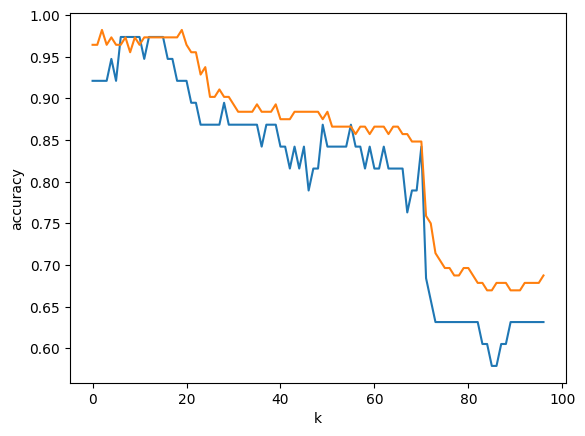



0.9732142857142857
0.9736842105263158


로지스틱 회귀 분석
0.9642857142857143
0.9210526315789473
['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']
[[0.868 0.132 0.   ]
 [0.023 0.832 0.145]
 [0.004 0.996 0.   ]
 [0.    1.    0.   ]
 [0.776 0.224 0.   ]]
['setosa' 'versicolor' 'virginica']
[[ 0.          2.62347061 -4.66938595 -2.7238956 ]
 [ 0.16607887 -1.79249076  2.01079007 -2.36675341]
 [ 0.79290827 -1.85627524 11.37125637  9.3104369 ]] [ -3.38487341  -1.16342276 -14.39578057]




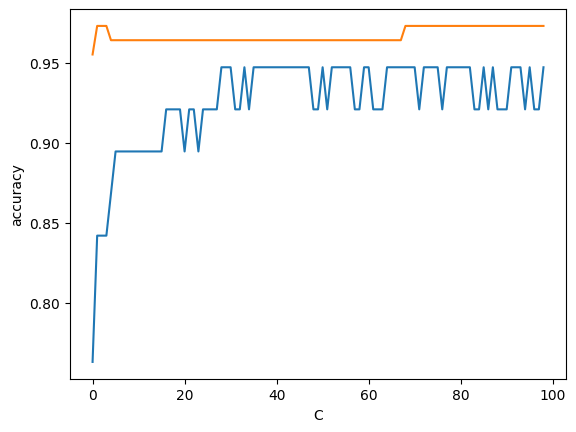

0.9642857142857143
0.9473684210526315
확률적 경사 하강법을 이용하여 다중 분류 훈련 및 최적화하기
0.8392857142857143
0.7631578947368421
0.9285714285714286
0.8421052631578947


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


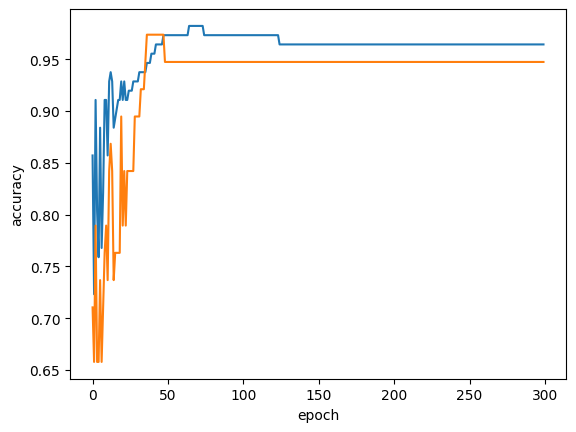

0.9553571428571429
0.868421052631579


In [37]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv")
print("데이터 준비")
print(data)
print("==================================================")
print("\n")

print("클래스 추출")
print(pd.unique(data['Species']))
iris_input = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = data['Species'].to_numpy()
print("==================================================")
print("\n")

print("입력 데이터와 정답 데이터를 생성해보자")
print(iris_input[:5])
print(iris_target[:5])
print("==================================================")
print("\n")

print("훈련 세트와 테스트 세트로 나누자")
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, stratify=iris_target, random_state = 42
)
print(train_input[:5])
print(train_target[:5])
print(test_input[:5])
print(test_target[:5])
print("==================================================")
print("\n")

print("데이터 표준화")
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])
print(test_scaled[:5])
print("==================================================")
print("\n")

print("k-최근접 이웃 알고리즘")
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print("==================================================")
print("\n")


print("==================================================")
print("최적화해보자")
import matplotlib.pyplot as plt
train_score = []
test_score = []
classes = np.unique(train_target)
for k in range(3, 100):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(train_scaled, train_target)
  test_score.append(model.score(test_scaled, test_target))
  train_score.append(model.score(train_scaled, train_target))
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
print("\n")
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=15)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print("==================================================")
print("\n")

print("로지스틱 회귀 분석")
from sklearn.linear_model import LogisticRegression
# 훈련
lr = LogisticRegression(C=20, max_iter=1000, penalty = 'l1', solver = 'liblinear')
lr.fit(train_scaled, train_target)
# 점수 확인
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 예측
print(lr.predict(test_scaled[:5]))
# 확률
print(np.round(lr.predict_proba(test_scaled[:5]),decimals=3))
# 클래스
print(lr.classes_)
# 계수
print(lr.coef_, lr.intercept_)
print("==================================================")
print("\n")

train_score = []
test_score = []
for i in range(1, 100):
  lr = LogisticRegression(C=i, max_iter = 10000, penalty = 'l1', solver = 'liblinear')
  lr.fit(train_scaled, train_target)
  train_score.append(lr.score(train_scaled, train_target))
  test_score.append(lr.score(test_scaled, test_target))
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
lr = LogisticRegression(C=30, max_iter=1000,penalty = 'l1', solver = 'liblinear')
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print("확률적 경사 하강법을 이용하여 다중 분류 훈련 및 최적화하기")
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss="log_loss", max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sc = SGDClassifier(loss='log_loss', max_iter=50, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


https://archive.ics.uci.edu/dataset/186/wine+quality